# 1. Using RR data

### Add root of CatNaviGATE to sys.path to import submodules of it.

In [25]:
import sys
import os

# Add the project root to sys.path so I can import submodules
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### Load Round Robin data

In [26]:
import os
import data.extract as ex
import analysis.data_analysis as da
import numpy as np

# Define the home directory zand path to data
home_dir = os.path.expanduser("~")
path = (home_dir +
        "/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/Accelerate/250502_Round_Robin/250505_finalized_RR_data/alldata")

# Keywords to exclude
exclude_keywords = [
    "0p0005", # data with too low Rh mass, likely to be inaccurate
    "(1)",    # data mistakenly uploaded twice
    "PercentLoading_Synthesis_MassLoading_Temperature_Date_Location", # example Excel file
    # "_SLAC",   # data from SLAC
    # "PSU",
]

# Create an instance of DataForGP
dataset = ex.DataForGP(path=path)
dataset.find_excel_files()
dataset.filter_excel_files(exclude_keywords=exclude_keywords, verbose=True)
dataset.construct_dataframe(extensive=False)
# dataset.convert_measured_to_nominal(which_column="Rh_total_mass")
dataset.convert_measured_to_nominal(which_column="Rh_total_mass", allowed_values=np.array([0.02])) # for Round Robin data
dataset.apply_duplicate_groupid(
    exclude_columns=['filename', 'experiment_date', 'location'],
    verbose=False
)

32 excel files were found:
0 files were filtered out:
data indexed 0 is not nominal:  0.01972573054352579 -> 0.02
data indexed 1 is not nominal:  0.02001 -> 0.02
data indexed 3 is not nominal:  0.019950000000000002 -> 0.02
data indexed 4 is not nominal:  0.0202120079576469 -> 0.02
data indexed 5 is not nominal:  0.0204 -> 0.02
data indexed 6 is not nominal:  0.02003736 -> 0.02
data indexed 7 is not nominal:  0.020099999999999996 -> 0.02
data indexed 8 is not nominal:  0.020033340042249353 -> 0.02
data indexed 9 is not nominal:  0.02004 -> 0.02
data indexed 10 is not nominal:  0.0203666116136285 -> 0.02
data indexed 11 is not nominal:  0.020099999999999996 -> 0.02
data indexed 12 is not nominal:  0.02008875023818638 -> 0.02
data indexed 16 is not nominal:  0.020011 -> 0.02
data indexed 17 is not nominal:  0.02000045487325554 -> 0.02
data indexed 18 is not nominal:  0.02000358 -> 0.02
data indexed 20 is not nominal:  0.020020747060179853 -> 0.02
data indexed 21 is not nominal:  0.0200505

### Calculate and add target metrics into the DataFrame

In [27]:
savgol=False
methods=[
            'initial value',
            'final value',
            'initial slope',
            'final slope',
            'overall slope',
            # 'delta'
        ]
for column in [
   # 'CO2 Conversion (%)',
   # 'CH4 Net Production Rate (mol/molRh/s)',
   'CO Net Production Rate (mol/molRh/s)',
   # 'CO Forward Production Rate (mol/molRh/s)',
   # 'Selectivity to CO (%)'
    ]:
    dataset.assign_target_values(
        savgol=savgol, methods=methods,
        column=column, temp_threshold=3.5, init_tos_buffer=0.5, adjacency_slope=1.0,
        )

# Construct unique DataFrame using group IDs
dataset.construct_unique_dataframe(verbose=True)

Group 1: 
mean of CO Net Production Rate (mol/molRh/s)_initial value:  1.24
mean of CO Net Production Rate (mol/molRh/s)_final value:  0.88
mean of CO Net Production Rate (mol/molRh/s)_initial slope: -0.08
mean of CO Net Production Rate (mol/molRh/s)_final slope: -0.03
mean of CO Net Production Rate (mol/molRh/s)_overall slope: -0.04
Group 2: 
mean of CO Net Production Rate (mol/molRh/s)_initial value:  5.56
mean of CO Net Production Rate (mol/molRh/s)_final value:  5.27
mean of CO Net Production Rate (mol/molRh/s)_initial slope:  0.02
mean of CO Net Production Rate (mol/molRh/s)_final slope: -0.01
mean of CO Net Production Rate (mol/molRh/s)_overall slope: -0.03
Group 3: 
mean of CO Net Production Rate (mol/molRh/s)_initial value:  1.41
mean of CO Net Production Rate (mol/molRh/s)_final value:  1.85
mean of CO Net Production Rate (mol/molRh/s)_initial slope:  0.11
mean of CO Net Production Rate (mol/molRh/s)_final slope:  0.01
mean of CO Net Production Rate (mol/molRh/s)_overall slope

In [28]:
dataset.df_us

,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
0,500.0,0.3,0.02,NP,0p3_RhNP_0p0197mg_500C_20250211_Cargnello1.xlsx,2025-02-11,Cargnello,3,1.490511,2.267916,0.172838,-0.049382,0.077721
1,500.0,0.3,0.02,WI,0p3_RhWI_0p02mg_500C_20250331_SLAC1.xlsx,2025-03-31,SLAC,4,3.551589,2.615114,-0.223355,-0.047163,-0.093556
2,500.0,0.1,0.02,WI,0p1_RhWI_0p02mg_500C_20250319_UCSBRR.xlsx,2025-03-19,UCSB,2,5.047597,4.849660,0.076785,-0.025381,-0.019789
3,500.0,0.3,0.02,WI,0p3_RhWI_0p0199mg_500C_20250415_SLAC1.xlsx,2025-04-15,SLAC,4,4.109359,3.920400,-0.170485,0.059455,-0.018861
4,500.0,2.0,0.02,WI,2_RhWI_0p0202mg_500C_20250317_Cargnello1.xlsx,2025-03-17,Cargnello,5,2.879354,2.187946,-0.299013,0.042865,-0.069124
5,500.0,0.3,0.02,WI,0p3_RhWI_0p0204mg_500C_20250421_SLAC1.xlsx,2025-04-21,SLAC,4,4.278839,3.110262,-0.261732,-0.019746,-0.116696
6,400.0,2.0,0.02,WI,2_RhWI_0p02mg_400C_20250422_SLAC1.xlsx,2025-04-22,SLAC,1,1.186813,0.886351,-0.063339,-0.021427,-0.029980
7,500.0,0.3,0.02,NP,0p3_RhNP_0p0201mg_500C_20250312_UCSBRR.xlsx,2025-03-12,UCSB,3,1.118103,1.565261,0.052492,0.040366,0.044705
8,500.0,0.3,0.02,WI,0p3_RhWI_0p02mg_500C_20250312_Cargnello1.xlsx,2025-03-12,Cargnello,4,3.697582,3.456458,-0.170877,-0.005046,-0.024106
9,500.0,2.0,0.02,WI,2_RhWI_0p02mg_500C_20250417_SLAC1.xlsx,2025-04-17,SLAC,5,3.220150,1.388805,-0.392029,-0.028997,-0.183018


## 1. Intra-/Interlab variability analysis using dispersion

### Min-max normalization to avoid implicit weight on some specific metrics

In [29]:
from sklearn.preprocessing import MinMaxScaler

metric_columns = dataset.df_us.columns[-5:]

# Min-max scale only the columns in 'metric_columns' of dataset.df_us (to avoid implicit weight on the metric with larger range)
scaler = MinMaxScaler()
df_scaled = dataset.df_us.copy()
df_scaled[metric_columns] = scaler.fit_transform(df_scaled[metric_columns])

In [30]:
scaler.data_max_, scaler.data_min_

(array([8.50477905, 6.53796915, 0.17283812, 0.13204413, 0.07772102]),
 array([ 0.94612634,  0.79502338, -3.00762793, -0.11494085, -0.2135349 ]))

In [31]:
df_scaled

,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
0,500.0,0.3,0.02,NP,0p3_RhNP_0p0197mg_500C_20250211_Cargnello1.xlsx,2025-02-11,Cargnello,3,0.072021,0.256470,1.000000,0.265437,1.000000
1,500.0,0.3,0.02,WI,0p3_RhWI_0p02mg_500C_20250331_SLAC1.xlsx,2025-03-31,SLAC,4,0.344699,0.316926,0.875429,0.274420,0.411935
2,500.0,0.1,0.02,WI,0p1_RhWI_0p02mg_500C_20250319_UCSBRR.xlsx,2025-03-19,UCSB,2,0.542619,0.706020,0.969799,0.362613,0.665210
3,500.0,0.3,0.02,WI,0p3_RhWI_0p0199mg_500C_20250415_SLAC1.xlsx,2025-04-15,SLAC,4,0.418492,0.544211,0.892052,0.706101,0.668395
4,500.0,2.0,0.02,WI,2_RhWI_0p0202mg_500C_20250317_Cargnello1.xlsx,2025-03-17,Cargnello,5,0.255764,0.242545,0.851641,0.638930,0.495823
5,500.0,0.3,0.02,WI,0p3_RhWI_0p0204mg_500C_20250421_SLAC1.xlsx,2025-04-21,SLAC,4,0.440914,0.403145,0.863363,0.385426,0.332489
6,400.0,2.0,0.02,WI,2_RhWI_0p02mg_400C_20250422_SLAC1.xlsx,2025-04-22,SLAC,1,0.031842,0.015903,0.925741,0.378622,0.630217
7,500.0,0.3,0.02,NP,0p3_RhNP_0p0201mg_500C_20250312_UCSBRR.xlsx,2025-03-12,UCSB,3,0.022752,0.134119,0.962161,0.628813,0.886642
8,500.0,0.3,0.02,WI,0p3_RhWI_0p02mg_500C_20250312_Cargnello1.xlsx,2025-03-12,Cargnello,4,0.364014,0.463427,0.891929,0.444944,0.650387
9,500.0,2.0,0.02,WI,2_RhWI_0p02mg_500C_20250417_SLAC1.xlsx,2025-04-17,SLAC,5,0.300850,0.103393,0.822395,0.347971,0.104779


### Function to calculate the dispersion (D)

In [32]:
def get_dispersion(df, metric_columns):
    """
    Calculate the dispersion of metric columns in a DataFrame.
    """

    # Calculate the centroid of the metric columns
    centroid = df[metric_columns].mean(axis=0)

    # Compute Euclidean distances from each point to the centroid
    distances = np.linalg.norm(df[metric_columns] - centroid, axis=1)

    # Compute average distance
    dispersion = np.mean(distances)

    return dispersion, centroid

### (1) Group dispersion

In [33]:
dfs_group = [df_scaled[df_scaled['GroupID'] == i] for i in range(1, 7)]
dispersion_overall_RR = []
for df_group in dfs_group:
    dispersion, _ = get_dispersion(df_group, metric_columns)
    dispersion_overall_RR.append(dispersion)
    print(f"Dispersion for GroupID {df_group['GroupID'].iloc[0]}: {dispersion:.4f}")

Dispersion for GroupID 1: 0.1114
Dispersion for GroupID 2: 0.1632
Dispersion for GroupID 3: 0.1625
Dispersion for GroupID 4: 0.1893
Dispersion for GroupID 5: 0.2311
Dispersion for GroupID 6: 0.6997


### (2) Intralab dispersion

In [34]:
df_intra_cargnello = df_scaled[df_scaled['location'] == 'Cargnello'][df_scaled['GroupID'] == 3]
df_intra_ucsb = df_scaled[df_scaled['location'] == 'UCSB'][df_scaled['GroupID'] == 2]
df_intra_slac = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 4]
df_intra_psu = df_scaled[df_scaled['location'] == 'PSU'][df_scaled['GroupID'] == 5]

dispersion_intra_RR = []
for df_intra in [df_intra_cargnello, df_intra_ucsb, df_intra_slac, df_intra_psu]:
    dispersion, _ = get_dispersion(df_intra, metric_columns)
    dispersion_intra_RR.append(dispersion)
    print(f"Dispersion for {df_intra['location'].iloc[0]} GroupID {df_intra['GroupID'].iloc[0]}: {dispersion:.4f}")

Dispersion for Cargnello GroupID 3: 0.1494
Dispersion for UCSB GroupID 2: 0.0299
Dispersion for SLAC GroupID 4: 0.2429
Dispersion for PSU GroupID 5: 0.0349


/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/1966958160.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_cargnello = df_scaled[df_scaled['location'] == 'Cargnello'][df_scaled['GroupID'] == 3]
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/1966958160.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_ucsb = df_scaled[df_scaled['location'] == 'UCSB'][df_scaled['GroupID'] == 2]
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/1966958160.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_slac = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 4]
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/1966958160.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_psu = df_scaled[df_scaled['location'] == 'PSU'][df_scaled['GroupID'] == 5]


### (3) Interlab dispersion

In [35]:
import pandas as pd
df_inter_g1 = df_scaled[df_scaled['GroupID'] == 1]

df_inter_g2 = df_scaled[df_scaled['GroupID'] == 2]
df_rest = df_inter_g2[df_inter_g2['location'] != 'UCSB']
df_dupl = df_inter_g2[df_inter_g2['location'] == 'UCSB']
_, centroid = get_dispersion(df_dupl, metric_columns)
display(centroid)
df_dupl = df_dupl.iloc[:1]
df_dupl[metric_columns] = centroid
df_inter_g2 = pd.concat([df_rest, df_dupl], axis=0)
display(df_inter_g2)

df_inter_g3 = df_scaled[df_scaled['GroupID'] == 3]
df_rest = df_inter_g3[df_inter_g3['location'] != 'Cargnello']
df_dupl = df_inter_g3[df_inter_g3['location'] == 'Cargnello']
_, centroid = get_dispersion(df_dupl, metric_columns)
display(centroid)
df_dupl = df_dupl.iloc[:1]
df_dupl[metric_columns] = centroid
df_inter_g3 = pd.concat([df_rest, df_dupl], axis=0)
display(df_inter_g3)

df_inter_g4 = df_scaled[df_scaled['GroupID'] == 4]
df_rest = df_inter_g4[df_inter_g4['location'] != 'SLAC']
df_dupl = df_inter_g4[df_inter_g4['location'] == 'SLAC']
_, centroid = get_dispersion(df_dupl, metric_columns)
display(centroid)
df_dupl = df_dupl.iloc[:1]
df_dupl[metric_columns] = centroid
df_inter_g4 = pd.concat([df_rest, df_dupl], axis=0)
display(df_inter_g4)

df_inter_g5 = df_scaled[df_scaled['GroupID'] == 5]
df_rest = df_inter_g5[df_inter_g5['location'] != 'PSU']
df_dupl = df_inter_g5[df_inter_g5['location'] == 'PSU']
_, centroid = get_dispersion(df_dupl, metric_columns)
display(centroid)
df_dupl = df_dupl.iloc[:1]
df_dupl[metric_columns] = centroid
df_inter_g5 = pd.concat([df_rest, df_dupl], axis=0)
display(df_inter_g5)

df_inter_g6 = df_scaled[df_scaled['GroupID'] == 6]

dispersion_inter_RR = []
for df_inter in [df_inter_g1, df_inter_g2, df_inter_g3, df_inter_g4, df_inter_g5, df_inter_g6]:
    dispersion, _ = get_dispersion(df_inter, metric_columns)
    dispersion_inter_RR.append(dispersion)
    print(f"Dispersion for GroupID {df_inter['GroupID'].iloc[0]}: {dispersion:.4f}")

CO Net Production Rate (mol/molRh/s)_initial value    0.541036
CO Net Production Rate (mol/molRh/s)_final value      0.714192
CO Net Production Rate (mol/molRh/s)_initial slope    0.966655
CO Net Production Rate (mol/molRh/s)_final slope      0.393681
CO Net Production Rate (mol/molRh/s)_overall slope    0.685425
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2279593757.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl[metric_columns] = centroid


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
16,500.0,0.1,0.02,WI,0p1_RhWI_0p02mg_500C_20250418_SLAC1.xlsx,2025-04-18,SLAC,2,0.745778,0.920326,0.968200,0.512332,0.561247
20,500.0,0.1,0.02,WI,0p1_RhWI_0p02mg_500C_20250314_Cargnello1.xlsx,2025-03-14,Cargnello,2,0.588105,0.678573,0.855416,0.356954,0.493088
29,500.0,0.1,0.02,WI,0p1_RhWI_0p02_500C_20250414_PSURight.xls,2025-04-14,PSU,2,0.704851,0.937606,0.984621,0.385188,0.701044
2,500.0,0.1,0.02,WI,0p1_RhWI_0p02mg_500C_20250319_UCSBRR.xlsx,2025-03-19,UCSB,2,0.541036,0.714192,0.966655,0.393681,0.685425


CO Net Production Rate (mol/molRh/s)_initial value    0.067616
CO Net Production Rate (mol/molRh/s)_final value      0.203287
CO Net Production Rate (mol/molRh/s)_initial slope    0.989015
CO Net Production Rate (mol/molRh/s)_final slope      0.384417
CO Net Production Rate (mol/molRh/s)_overall slope    0.906587
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2279593757.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl[metric_columns] = centroid


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
7,500.0,0.3,0.02,NP,0p3_RhNP_0p0201mg_500C_20250312_UCSBRR.xlsx,2025-03-12,UCSB,3,0.022752,0.134119,0.962161,0.628813,0.886642
21,500.0,0.3,0.02,NP,0p3_RhNP_0p0201mg_500C_20250424_SLAC1.xlsx,2025-04-24,SLAC,3,0.110720,0.196075,0.985382,0.576935,0.780397
27,500.0,0.3,0.02,NP,0p3_RhNP_0p0204_500C_20250315_PSULeft.xls,2025-03-15,PSU,3,0.034971,0.157536,0.959212,0.611467,0.899911
0,500.0,0.3,0.02,NP,0p3_RhNP_0p0197mg_500C_20250211_Cargnello1.xlsx,2025-02-11,Cargnello,3,0.067616,0.203287,0.989015,0.384417,0.906587


CO Net Production Rate (mol/molRh/s)_initial value    0.401368
CO Net Production Rate (mol/molRh/s)_final value      0.421428
CO Net Production Rate (mol/molRh/s)_initial slope    0.876948
CO Net Production Rate (mol/molRh/s)_final slope      0.455316
CO Net Production Rate (mol/molRh/s)_overall slope    0.470940
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2279593757.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl[metric_columns] = centroid


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
8,500.0,0.3,0.02,WI,0p3_RhWI_0p02mg_500C_20250312_Cargnello1.xlsx,2025-03-12,Cargnello,4,0.364014,0.463427,0.891929,0.444944,0.650387
11,500.0,0.3,0.02,WI,0p3_RhWI_0p0201mg_500C_20250311_UCSBRR.xlsx,2025-03-11,UCSB,4,0.329106,0.391403,0.901910,0.430427,0.598980
25,500.0,0.3,0.02,WI,0p3_RhWI_0p0207_500C_20250315_PSURight.xls,2025-03-15,PSU,4,0.328569,0.439565,0.913142,0.502135,0.695580
1,500.0,0.3,0.02,WI,0p3_RhWI_0p02mg_500C_20250331_SLAC1.xlsx,2025-03-31,SLAC,4,0.401368,0.421428,0.876948,0.455316,0.470940


CO Net Production Rate (mol/molRh/s)_initial value    0.329522
CO Net Production Rate (mol/molRh/s)_final value      0.438639
CO Net Production Rate (mol/molRh/s)_initial slope    0.912643
CO Net Production Rate (mol/molRh/s)_final slope      0.526357
CO Net Production Rate (mol/molRh/s)_overall slope    0.691314
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2279593757.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl[metric_columns] = centroid


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
4,500.0,2.0,0.02,WI,2_RhWI_0p0202mg_500C_20250317_Cargnello1.xlsx,2025-03-17,Cargnello,5,0.255764,0.242545,0.851641,0.638930,0.495823
9,500.0,2.0,0.02,WI,2_RhWI_0p02mg_500C_20250417_SLAC1.xlsx,2025-04-17,SLAC,5,0.300850,0.103393,0.822395,0.347971,0.104779
15,500.0,2.0,0.02,WI,2_RhWI_0p02mg_500C_20250307_UCSBRR.xlsx,2025-03-07,UCSB,5,0.342509,0.391684,0.892376,0.409304,0.564754
26,500.0,2.0,0.02,WI,2p0_RhWI_0p02_500C_20250331_PSURight.xls,2025-03-31,PSU,5,0.329522,0.438639,0.912643,0.526357,0.691314


Dispersion for GroupID 1: 0.1114
Dispersion for GroupID 2: 0.1844
Dispersion for GroupID 3: 0.1139
Dispersion for GroupID 4: 0.0909
Dispersion for GroupID 5: 0.2622
Dispersion for GroupID 6: 0.6997


## 2. Visualization of data in metric space

In [8]:
df_selected = df_scaled.iloc[:, 8:]
df_selected

,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
0,0.072021,0.256470,1.000000,0.265437,1.000000
1,0.344699,0.316926,0.875429,0.274420,0.411935
2,0.542619,0.706020,0.969799,0.362613,0.665210
3,0.418492,0.544211,0.892052,0.706101,0.668395
4,0.255764,0.242545,0.851641,0.638930,0.495823
5,0.440914,0.403145,0.863363,0.385426,0.332489
6,0.031842,0.015903,0.925741,0.378622,0.630217
7,0.022752,0.134119,0.962161,0.628813,0.886642
8,0.364014,0.463427,0.891929,0.444944,0.650387
9,0.300850,0.103393,0.822395,0.347971,0.104779


In [10]:
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.manifold import TSNE 
# import umap.umap_ as umap
from umap.umap_ import UMAP
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.manifold import trustworthiness

X = df_selected.values

PCA = PCA(n_components=2, 
          # random_state=0
          )
X_p = PCA.fit_transform(X)
# PCA explanained variance ratio
print(f'PCA explained variance ratio: {PCA.explained_variance_ratio_}')


# Define hyperparameter grids
tsne_params = {
    'perplexity': [5, 7, 10, 12, 15, 18, 20],
    'n_iter': [500, 750, 1000, 1500],
    'learning_rate': [50, 100, 200, 300, 500, 800]
}
umap_params = {
    'n_neighbors': [3, 5, 7, 10, 12, 15, 18, 20],
    'min_dist': [0.0, 0.05, 0.1, 0.2, 0.3, 0.5],
    'spread': [0.8, 1.0, 1.2, 1.5, 2.0],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Optimize TSNE
best_tsne_score = float('inf')
best_tsne = None
best_X_t = None
for params in ParameterGrid(tsne_params):
    tsne = TSNE(n_components=2, **params)
    X_t_candidate = tsne.fit_transform(X)
    # Use KL divergence as score (lower is better)
    score = tsne.kl_divergence_
    if score < best_tsne_score:
        best_tsne_score = score
        best_tsne = tsne
        best_X_t = X_t_candidate
X_t = best_X_t

# Optimize UMAP
best_umap_score = float('-inf')
best_umap = None
best_X_u = None
for params in ParameterGrid(umap_params):
    umap_model = UMAP(n_components=2, **params)
    X_u_candidate = umap_model.fit_transform(X)
    # Use local continuity meta-criterion (LCMC) as a simple score (higher is better)
    # Here, we use trustworthiness as a proxy
    score = trustworthiness(X, X_u_candidate, n_neighbors=5)
    if score > best_umap_score:
        best_umap_score = score
        best_umap = umap_model
        best_X_u = X_u_candidate
X_u = best_X_u

PCA explained variance ratio: [0.63735757 0.18045863]


/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was re

In [1]:
# plot convex hull for each group
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(6, 5), ncols=1, nrows=1)
palette = sns.color_palette("husl", n_colors=len(df_scaled['GroupID'].unique()))

# Plot the PCA scatter first
location_markers = {'Cargnello': '^', 'SLAC': 's', 'UCSB': 'o', 'PSU': 'P'}
scatter_pca = sns.scatterplot(
    x=X_p[:, 0], y=X_p[:, 1], hue=df_scaled['GroupID'], style=df_scaled['location'], 
    palette=palette,
    markers=location_markers,
    legend="auto", 
    edgecolor="k", s=100,
    ax=ax,
    zorder=2,
)

# Overlay convex hulls for each group on the same axes
unique_groups = df_scaled['GroupID'].unique()
unique_groups = np.sort(unique_groups)
for i, group in enumerate(unique_groups):
    group_mask = df_scaled['GroupID'] == group
    points = X_p[group_mask]
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]
        hull_pts = np.concatenate([hull_pts, hull_pts[:1]], axis=0)
        ax.plot(hull_pts[:, 0], hull_pts[:, 1], lw=2, label=f'Group {group} hull', alpha=0.5, color=palette[i], zorder=1)
        ax.fill(hull_pts[:, 0], hull_pts[:, 1], alpha=0.15, color=palette[i], zorder=1)

ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend(
    # title="GroupID",
    bbox_to_anchor=(1.05, 1), loc='upper left'
    )

# Set limits with a margin
margin = 0.2
ax.set_xlim(X_p[:, 0].min() - margin, X_p[:, 0].max() + margin)
ax.set_ylim(X_p[:, 1].min() - margin, X_p[:, 1].max() + margin)
plt.show()


# Plot t-SNE and UMAP
sns.scatterplot(x=X_t[:, 0], y=X_t[:, 1], hue=df_scaled['GroupID'], palette="deep", legend="full")
plt.title("t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
sns.scatterplot(x=X_u[:, 0], y=X_u[:, 1], hue=df_scaled['GroupID'], palette="deep", legend="full")
plt.title("UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

NameError: name 'plt' is not defined

In [10]:
import plotly.express as px

import pandas as pd

# Prepare DataFrames for each embedding
df_pca = df_selected.copy()
df_pca['PC1'] = X_p[:, 0]
df_pca['PC2'] = X_p[:, 1]
df_pca['GroupID'] = dataset.df_us['GroupID'].values

df_tsne = df_selected.copy()
df_tsne['TSNE1'] = X_t[:, 0]
df_tsne['TSNE2'] = X_t[:, 1]
df_tsne['GroupID'] = dataset.df_us['GroupID'].values

df_umap = df_selected.copy()
df_umap['UMAP1'] = X_u[:, 0]
df_umap['UMAP2'] = X_u[:, 1]
df_umap['GroupID'] = dataset.df_us['GroupID'].values

# PCA plot
fig_pca = px.scatter(
    df_pca,
    x='PC1', y='PC2',
    color='GroupID',
    hover_data=df_selected.columns,
    title="PCA",
    width=600,
    height=600
)
fig_pca.show()

# t-SNE plot
fig_tsne = px.scatter(
    df_tsne,
    x='TSNE1', y='TSNE2',
    color='GroupID',
    hover_data=df_selected.columns,
    title="t-SNE",
    width=600,
    height=600
)
fig_tsne.show()

# UMAP plot
fig_umap = px.scatter(
    df_umap,
    x='UMAP1', y='UMAP2',
    color='GroupID',
    hover_data=df_selected.columns,
    title="UMAP",
    width=600,
    height=600
)
fig_umap.show()

# 2. Using Old data (before RR)

### Add root of CatNaviGATE to sys.path to import submodules of it.

In [1]:
import sys
import os

# Add the project root to sys.path so I can import submodules
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### Load Round Robin data

In [36]:
import os
import data.extract as ex
import analysis.data_analysis as da
import numpy as np

# Define the home directory zand path to data
home_dir = os.path.expanduser("~")
path = (home_dir +
        # "/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/Accelerate/250502_Round_Robin/250505_finalized_RR_data/alldata")
        "/Google Drive/Shared drives/Accelerating Innovations Team Drive/2. Research/8. Data/02 GC Experimental Data")

# Keywords to exclude
exclude_keywords = [
    "0p0005", # data with too low Rh mass, likely to be inaccurate
    "(1)",    # data mistakenly uploaded twice
    "PercentLoading_Synthesis_MassLoading_Temperature_Date_Location", # example Excel file
    # "_SLAC",   # data from SLAC
    # "PSU",
]

# Create an instance of DataForGP
dataset = ex.DataForGP(path=path)
dataset.find_excel_files()
dataset.filter_excel_files(exclude_keywords=exclude_keywords, verbose=True)
dataset.construct_dataframe(extensive=False)
dataset.convert_measured_to_nominal(which_column="Rh_total_mass")
# dataset.convert_measured_to_nominal(which_column="Rh_total_mass", allowed_values=np.array([0.02])) # for Round Robin data
dataset.apply_duplicate_groupid(
    exclude_columns=['filename', 'experiment_date', 'location'],
    verbose=False
)

35 excel files were found:
3 files were filtered out:
/Users/dongjae/Google Drive/Shared drives/Accelerating Innovations Team Drive/2. Research/8. Data/02 GC Experimental Data/PercentLoading_Synthesis_MassLoading_Temperature_Date_Location v1.xlsx
/Users/dongjae/Google Drive/Shared drives/Accelerating Innovations Team Drive/2. Research/8. Data/02 GC Experimental Data/1_RhWI_0p0005mg_300C_20241015_UCSBRR.xlsx
/Users/dongjae/Google Drive/Shared drives/Accelerating Innovations Team Drive/2. Research/8. Data/02 GC Experimental Data/0p1_RhWI_0p005mg_300C_20241202_UCSBRL (1).xlsx
data indexed 2 is not nominal:  0.02011772530761556 -> 0.02
data indexed 9 is not nominal:  0.02026068695379248 -> 0.02
data indexed 15 is not nominal:  0.005098880927531976 -> 0.005
data indexed 17 is not nominal:  0.01977362991058778 -> 0.02
data indexed 31 is not nominal:  0.02002987358616101 -> 0.02


### Calculate and add target metrics into the DataFrame

In [37]:
savgol=False
methods=[
            'initial value',
            'final value',
            'initial slope',
            'final slope',
            'overall slope',
            # 'delta'
        ]
for column in [
   # 'CO2 Conversion (%)',
   # 'CH4 Net Production Rate (mol/molRh/s)',
   'CO Net Production Rate (mol/molRh/s)',
   # 'CO Forward Production Rate (mol/molRh/s)',
   # 'Selectivity to CO (%)'
    ]:
    dataset.assign_target_values(
        savgol=savgol, methods=methods,
        column=column, temp_threshold=3.5, init_tos_buffer=0.5, adjacency_slope=1.0,
        )

# Construct unique DataFrame using group IDs
dataset.construct_unique_dataframe(verbose=True)


Group 1: 
mean of CO Net Production Rate (mol/molRh/s)_initial value:  4.38
mean of CO Net Production Rate (mol/molRh/s)_final value:  3.84
mean of CO Net Production Rate (mol/molRh/s)_initial slope: -0.03
mean of CO Net Production Rate (mol/molRh/s)_final slope: -0.05
mean of CO Net Production Rate (mol/molRh/s)_overall slope: -0.05
Group 2: 
mean of CO Net Production Rate (mol/molRh/s)_initial value:  2.03
mean of CO Net Production Rate (mol/molRh/s)_final value:  1.87
mean of CO Net Production Rate (mol/molRh/s)_initial slope:  0.12
mean of CO Net Production Rate (mol/molRh/s)_final slope: -0.04
mean of CO Net Production Rate (mol/molRh/s)_overall slope: -0.02
Group 3: 
mean of CO Net Production Rate (mol/molRh/s)_initial value:  6.59
mean of CO Net Production Rate (mol/molRh/s)_final value:  5.32
mean of CO Net Production Rate (mol/molRh/s)_initial slope: -0.12
mean of CO Net Production Rate (mol/molRh/s)_final slope: -0.07
mean of CO Net Production Rate (mol/molRh/s)_overall slope

In [38]:
dataset.df_us

,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
0,500.0,0.50,0.020,WI,0p5_RhWI_0p02mg_500C_20240422_UCSBRL.xlsx,2024-04-22,UCSB,5,2.556669,2.368365,-0.074808,0.003971,-0.018717
1,500.0,0.10,0.020,WI,0p1_RhWI_0p02mg_500C_20241008_SLAC1.xlsx,2024-10-08,SLAC,1,3.661632,3.157476,-0.000399,-0.040592,-0.050396
2,500.0,0.50,0.020,NP,0p5_RhNP_0p0201mg_500C_20240705_Cargnello1.xlsx,2024-07-05,Cargnello,4,1.430540,2.255860,0.116179,-0.057963,0.082509
3,500.0,0.25,0.020,WI,0p25_RhWI_0p02mg_500C_20241001_SLAC1.xlsx,2024-10-01,SLAC,3,6.753629,5.830223,0.154853,-0.005189,-0.092146
4,500.0,5.00,0.020,WI,5_RhWI_0p02mg_500C_20240427_UCSBRR.xlsx,2024-04-27,UCSB,0,0.468090,0.578947,0.005669,0.006935,0.011028
5,300.0,1.00,0.005,WI,1_RhWI_0p005mg_300C_20241220_UCSBRL.xlsx,2024-12-20,UCSB,0,0.426654,0.335688,-0.017037,-0.007283,-0.009043
6,500.0,0.25,0.010,NP,0p25_RhNP_0p01mg_500C_20240523_UCSBRR.xlsx,2024-05-23,UCSB,0,2.228857,2.218015,0.037866,-0.014984,-0.001078
7,500.0,0.25,0.020,NP,0p25_RhNP_0p02mg_500C_20240610_UCSBRL.xlsx,2024-06-10,UCSB,2,1.629169,1.497391,0.000902,-0.011535,-0.013100
8,500.0,0.50,0.020,WI,0p5_RhWI_0p02mg_500C_20240925_SLAC1.xlsx,2024-09-25,SLAC,5,18.231120,15.306604,-0.610600,-0.265503,-0.291585
9,400.0,1.00,0.020,NP,1_RhNP_0p0203mg_400C_20241120_Cargnello1.xlsx,2024-11-20,Cargnello,0,0.757604,0.613733,-0.017424,-0.010432,-0.014384


## 1. Intra-/Interlab variability analysis using dispersion

### Min-max normalization to avoid implicit weight on some specific metrics

In [39]:
scaler.data_max_, scaler.data_min_

(array([8.50477905, 6.53796915, 0.17283812, 0.13204413, 0.07772102]),
 array([ 0.94612634,  0.79502338, -3.00762793, -0.11494085, -0.2135349 ]))

In [40]:
from sklearn.preprocessing import MinMaxScaler

metric_columns = dataset.df_us.columns[-5:]

# Min-max scale only the columns in 'metric_columns' of dataset.df_us (to avoid implicit weight on the metric with larger range)
# scaler2 = MinMaxScaler()
df_scaled = dataset.df_us.copy()
# Normalize the data using MinMaxScaler that was fitted on the RR data
df_scaled[metric_columns] = scaler.transform(df_scaled[metric_columns])

In [41]:
df_scaled

,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
0,500.0,0.50,0.020,WI,0p5_RhWI_0p02mg_500C_20240422_UCSBRL.xlsx,2024-04-22,UCSB,5,0.213073,0.273961,0.922135,0.481452,0.668889
1,500.0,0.10,0.020,WI,0p1_RhWI_0p02mg_500C_20241008_SLAC1.xlsx,2024-10-08,SLAC,1,0.359258,0.411366,0.945531,0.301026,0.560122
2,500.0,0.50,0.020,NP,0p5_RhNP_0p0201mg_500C_20240705_Cargnello1.xlsx,2024-07-05,Cargnello,4,0.064087,0.254371,0.982185,0.230693,1.016439
3,500.0,0.25,0.020,WI,0p25_RhWI_0p02mg_500C_20241001_SLAC1.xlsx,2024-10-01,SLAC,3,0.768325,0.876763,0.994345,0.444365,0.416777
4,500.0,5.00,0.020,WI,5_RhWI_0p02mg_500C_20240427_UCSBRR.xlsx,2024-04-27,UCSB,0,-0.063244,-0.037625,0.947439,0.493456,0.771015
5,300.0,1.00,0.005,WI,1_RhWI_0p005mg_300C_20241220_UCSBRL.xlsx,2024-12-20,UCSB,0,-0.068725,-0.079982,0.940300,0.435888,0.702104
6,500.0,0.25,0.010,NP,0p25_RhNP_0p01mg_500C_20240523_UCSBRR.xlsx,2024-05-23,UCSB,0,0.169704,0.247781,0.957562,0.404707,0.729452
7,500.0,0.25,0.020,NP,0p25_RhNP_0p02mg_500C_20240610_UCSBRL.xlsx,2024-06-10,UCSB,2,0.090366,0.122301,0.945940,0.418671,0.688174
8,500.0,0.50,0.020,WI,0p5_RhWI_0p02mg_500C_20240925_SLAC1.xlsx,2024-09-25,SLAC,5,2.286782,2.526853,0.753672,-0.609602,-0.267978
9,400.0,1.00,0.020,NP,1_RhNP_0p0203mg_400C_20241120_Cargnello1.xlsx,2024-11-20,Cargnello,0,-0.024941,-0.031567,0.940178,0.423139,0.683768


### Function to calculate the dispersion (D)

In [42]:
def get_dispersion(df, metric_columns):
    """
    Calculate the dispersion of metric columns in a DataFrame.
    """

    # Calculate the centroid of the metric columns
    centroid = df[metric_columns].mean(axis=0)

    # Compute Euclidean distances from each point to the centroid
    distances = np.linalg.norm(df[metric_columns] - centroid, axis=1)

    # Compute average distance
    dispersion = np.mean(distances)

    return dispersion, centroid

### (1) Group dispersion

In [43]:
dfs_group = [df_scaled[df_scaled['GroupID'] == i] for i in range(1, 6)]
dispersion_overall_old = []
for df_group in dfs_group:
    dispersion, _ = get_dispersion(df_group, metric_columns)
    dispersion_overall_old.append(dispersion)
    print(f"Dispersion for GroupID {df_group['GroupID'].iloc[0]}: {dispersion:.4f}")

Dispersion for GroupID 1: 0.2554
Dispersion for GroupID 2: 0.1335
Dispersion for GroupID 3: 0.2024
Dispersion for GroupID 4: 0.2049
Dispersion for GroupID 5: 1.4920


### (2) Intralab dispersion

SLAC-g1, UCSB-g3, SLAC-g3, UCSB-g4, SLAC-g5, UCSB-g5

In [44]:
df_intra_slac_g1 = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 1]
df_intra_slac_g3 = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 3]
df_intra_slac_g5 = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 5]

df_intra_ucsb_g3 = df_scaled[df_scaled['location'] == 'UCSB'][df_scaled['GroupID'] == 3]
df_intra_ucsb_g4 = df_scaled[df_scaled['location'] == 'UCSB'][df_scaled['GroupID'] == 4]
df_intra_ucsb_g5 = df_scaled[df_scaled['location'] == 'UCSB'][df_scaled['GroupID'] == 5]

# df_intra_cargnello = df_scaled[df_scaled['location'] == 'Cargnello'][df_scaled['GroupID'] == 3]
# df_intra_psu = df_scaled[df_scaled['location'] == 'PSU'][df_scaled['GroupID'] == 5]

dispersion_intra_old = []
for df_intra in [df_intra_slac_g1, df_intra_slac_g3, df_intra_slac_g5, df_intra_ucsb_g3, df_intra_ucsb_g4, df_intra_ucsb_g5]:
    dispersion, _ = get_dispersion(df_intra, metric_columns)
    dispersion_intra_old.append(dispersion)
    print(f"Dispersion for {df_intra['location'].iloc[0]} GroupID {df_intra['GroupID'].iloc[0]}: {dispersion:.4f}")

Dispersion for SLAC GroupID 1: 0.0728
Dispersion for SLAC GroupID 3: 0.2040
Dispersion for SLAC GroupID 5: 0.6046
Dispersion for UCSB GroupID 3: 0.1136
Dispersion for UCSB GroupID 4: 0.0242
Dispersion for UCSB GroupID 5: 0.1708


/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2308843391.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_slac_g1 = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 1]
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2308843391.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_slac_g3 = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 3]
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2308843391.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_slac_g5 = df_scaled[df_scaled['location'] == 'SLAC'][df_scaled['GroupID'] == 5]
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/2308843391.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intra_ucsb_g3 = df_scaled[df_scaled['location'] == 'UCSB'][df_scaled['GroupID'] == 3]
/var

### (3) Interlab dispersion

In [45]:
import pandas as pd
df_inter_g1 = df_scaled[df_scaled['GroupID'] == 1]
df_rest = df_inter_g1[df_inter_g1['location'] != 'SLAC']
df_dupl = df_inter_g1[df_inter_g1['location'] == 'SLAC']
_, centroid = get_dispersion(df_dupl, metric_columns)
display(centroid)
df_dupl = df_dupl.iloc[:1] # first row as a dummy
df_dupl[metric_columns] = centroid
df_inter_g1 = pd.concat([df_rest, df_dupl], axis=0)
display(df_inter_g1)

df_inter_g2 = df_scaled[df_scaled['GroupID'] == 2]

df_inter_g3 = df_scaled[df_scaled['GroupID'] == 3]
df_dupl1 = df_inter_g3[df_inter_g3['location'] == 'SLAC']
df_dupl2 = df_inter_g3[df_inter_g3['location'] == 'UCSB']
_, centroid1 = get_dispersion(df_dupl1, metric_columns)
_, centroid2 = get_dispersion(df_dupl2, metric_columns)
display(centroid1)
display(centroid2)
df_dupl1 = df_dupl1.iloc[:1]
df_dupl1[metric_columns] = centroid1
df_dupl2 = df_dupl2.iloc[:1]
df_dupl2[metric_columns] = centroid2
df_inter_g3 = pd.concat([df_dupl1, df_dupl2], axis=0)
display(df_inter_g3)

df_inter_g4 = df_scaled[df_scaled['GroupID'] == 4]
df_rest = df_inter_g4[df_inter_g4['location'] != 'UCSB']
df_dupl = df_inter_g4[df_inter_g4['location'] == 'UCSB']
_, centroid = get_dispersion(df_dupl, metric_columns)
display(centroid)
df_dupl = df_dupl.iloc[:1]
df_dupl[metric_columns] = centroid
df_inter_g4 = pd.concat([df_rest, df_dupl], axis=0)
display(df_inter_g4)

df_inter_g5 = df_scaled[df_scaled['GroupID'] == 5]
df_dupl1 = df_inter_g5[df_inter_g5['location'] == 'SLAC']
df_dupl2 = df_inter_g5[df_inter_g5['location'] == 'UCSB']
_, centroid1 = get_dispersion(df_dupl1, metric_columns)
_, centroid2 = get_dispersion(df_dupl2, metric_columns)
display(centroid1)
display(centroid2)
df_dupl1 = df_dupl1.iloc[:1]
df_dupl1[metric_columns] = centroid1
df_dupl2 = df_dupl2.iloc[:1]
df_dupl2[metric_columns] = centroid2
df_inter_g5 = pd.concat([df_dupl1, df_dupl2], axis=0)
display(df_inter_g5)

# df_inter_g6 = df_scaled[df_scaled['GroupID'] == 6]

dispersion_inter_old = []
for df_inter in [df_inter_g1, df_inter_g2, df_inter_g3, df_inter_g4, df_inter_g5]:
    dispersion, _ = get_dispersion(df_inter, metric_columns)
    dispersion_inter_old.append(dispersion)
    print(f"Dispersion for GroupID {df_inter['GroupID'].iloc[0]}: {dispersion:.4f}")

CO Net Production Rate (mol/molRh/s)_initial value    0.342463
CO Net Production Rate (mol/molRh/s)_final value      0.387932
CO Net Production Rate (mol/molRh/s)_initial slope    0.941016
CO Net Production Rate (mol/molRh/s)_final slope      0.234403
CO Net Production Rate (mol/molRh/s)_overall slope    0.557742
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/653853074.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl[metric_columns] = centroid


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
28,500.0,0.1,0.02,WI,0p1_RhWI_0p02mg_500C_20240311_UCSBRR.xlsx,2024-03-11,UCSB,1,0.679277,0.816467,0.927828,0.361384,0.529064
1,500.0,0.1,0.02,WI,0p1_RhWI_0p02mg_500C_20241008_SLAC1.xlsx,2024-10-08,SLAC,1,0.342463,0.387932,0.941016,0.234403,0.557742


CO Net Production Rate (mol/molRh/s)_initial value    0.804152
CO Net Production Rate (mol/molRh/s)_final value      0.881474
CO Net Production Rate (mol/molRh/s)_initial slope    0.949708
CO Net Production Rate (mol/molRh/s)_final slope      0.267424
CO Net Production Rate (mol/molRh/s)_overall slope    0.332952
dtype: float64

CO Net Production Rate (mol/molRh/s)_initial value    0.689418
CO Net Production Rate (mol/molRh/s)_final value      0.693995
CO Net Production Rate (mol/molRh/s)_initial slope    0.864589
CO Net Production Rate (mol/molRh/s)_final slope      0.133316
CO Net Production Rate (mol/molRh/s)_overall slope    0.263048
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/653853074.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl1[metric_columns] = centroid1
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/653853074.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl2[metric_columns] = centroid2


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
3,500.0,0.25,0.02,WI,0p25_RhWI_0p02mg_500C_20241001_SLAC1.xlsx,2024-10-01,SLAC,3,0.804152,0.881474,0.949708,0.267424,0.332952
10,500.0,0.25,0.02,WI,0p25_RhWI_0p02mg_500C_20240307_UCSBRL.xlsx,2024-03-07,UCSB,3,0.689418,0.693995,0.864589,0.133316,0.263048


CO Net Production Rate (mol/molRh/s)_initial value    0.031947
CO Net Production Rate (mol/molRh/s)_final value      0.150977
CO Net Production Rate (mol/molRh/s)_initial slope    0.963097
CO Net Production Rate (mol/molRh/s)_final slope      0.659479
CO Net Production Rate (mol/molRh/s)_overall slope    0.894648
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/653853074.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl[metric_columns] = centroid


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
2,500.0,0.5,0.02,NP,0p5_RhNP_0p0201mg_500C_20240705_Cargnello1.xlsx,2024-07-05,Cargnello,4,0.064087,0.254371,0.982185,0.230693,1.016439
12,500.0,0.5,0.02,NP,0p5_RhNP_0p02mg_500C_20240923_UCSBRR.xlsx,2024-09-23,UCSB,4,0.031947,0.150977,0.963097,0.659479,0.894648


CO Net Production Rate (mol/molRh/s)_initial value    2.273306
CO Net Production Rate (mol/molRh/s)_final value      2.319265
CO Net Production Rate (mol/molRh/s)_initial slope    0.606666
CO Net Production Rate (mol/molRh/s)_final slope     -0.223126
CO Net Production Rate (mol/molRh/s)_overall slope   -0.641323
dtype: float64

CO Net Production Rate (mol/molRh/s)_initial value    0.312195
CO Net Production Rate (mol/molRh/s)_final value      0.376851
CO Net Production Rate (mol/molRh/s)_initial slope    0.901846
CO Net Production Rate (mol/molRh/s)_final slope      0.407749
CO Net Production Rate (mol/molRh/s)_overall slope    0.614783
dtype: float64

/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/653853074.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl1[metric_columns] = centroid1
/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_42818/653853074.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dupl2[metric_columns] = centroid2


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,filename,experiment_date,location,GroupID,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
8,500.0,0.5,0.02,WI,0p5_RhWI_0p02mg_500C_20240925_SLAC1.xlsx,2024-09-25,SLAC,5,2.273306,2.319265,0.606666,-0.223126,-0.641323
0,500.0,0.5,0.02,WI,0p5_RhWI_0p02mg_500C_20240422_UCSBRL.xlsx,2024-04-22,UCSB,5,0.312195,0.376851,0.901846,0.407749,0.614783


Dispersion for GroupID 1: 0.2803
Dispersion for GroupID 2: 0.1335
Dispersion for GroupID 3: 0.1400
Dispersion for GroupID 4: 0.2296
Dispersion for GroupID 5: 1.5558


## 1-1. Comparison: RR vs. Old

In [46]:
dispersion_intra_RR

[0.14943208186853432,
 0.029928847836826682,
 0.24292731208031074,
 0.034884218377178915]

In [49]:
# DataFrame for overall dispersion
df_dispersion_overall = pd.DataFrame({
    'data source': ['Old']*len(dispersion_overall_old)+['Round Robin']*len(dispersion_overall_RR),
    'Dispersion': dispersion_overall_old + dispersion_overall_RR,
})

df_dispersion_inter = pd.DataFrame({
    'data source': ['Old']*len(dispersion_inter_old)+['Round Robin']*len(dispersion_inter_RR),
    'Dispersion': dispersion_inter_old + dispersion_inter_RR,
})

df_dispersion_intra = pd.DataFrame({
    'data source': ['Old']*len(dispersion_intra_old)+['Round Robin']*len(dispersion_intra_RR),
    'Dispersion': dispersion_intra_old + dispersion_intra_RR,
    'location': ['SLAC']*3+['UCSB']*3+['Cargnello']*1+['UCSB']*1+['SLAC']*1+['PSU']*1,
})

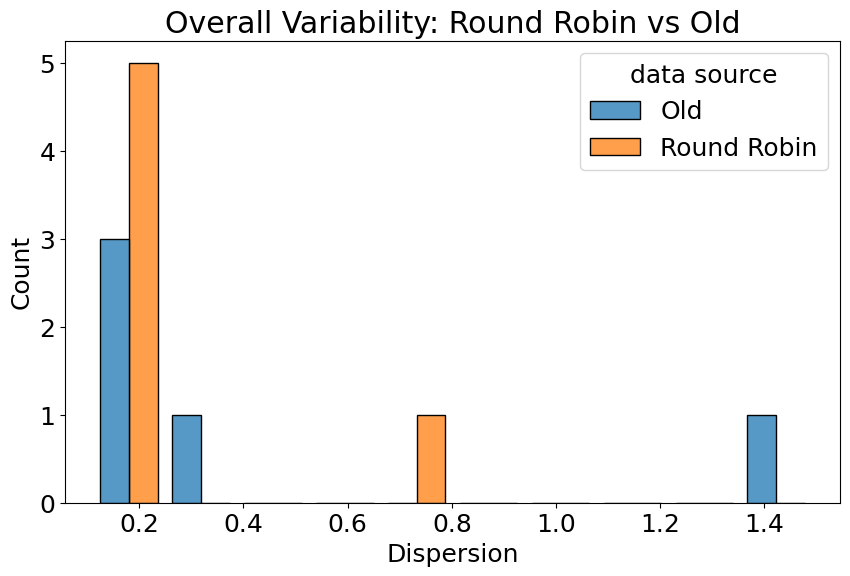

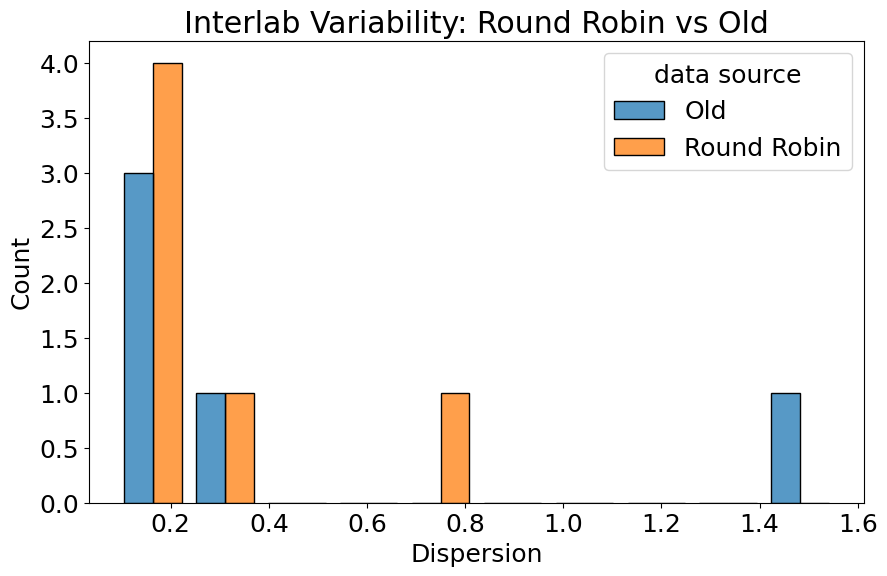

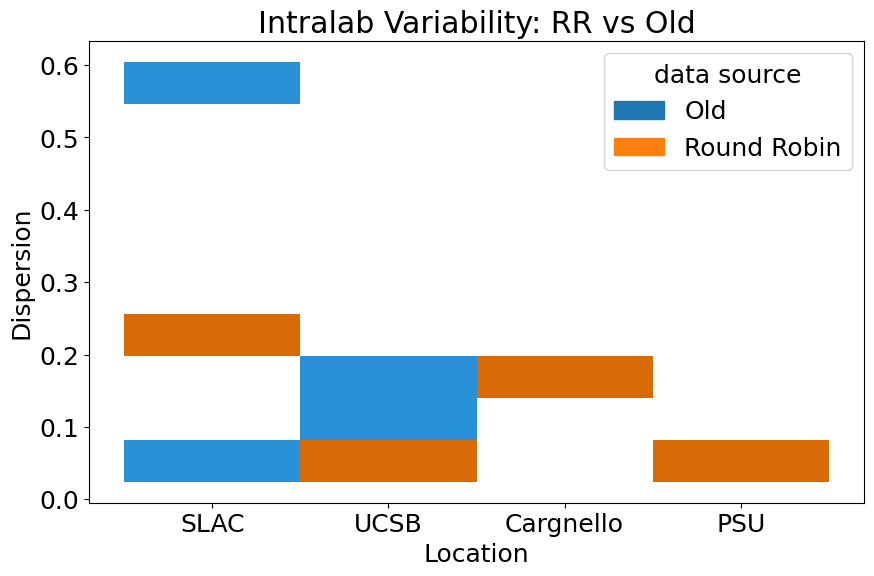

In [50]:
# histogram of dispersions
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the font size
plt.rcParams.update({'font.size': 18})

# Overall variability
plt.figure(figsize=(10, 6))
sns.histplot(
    df_dispersion_overall, 
    bins=10, 
    hue='data source', legend=True,
    x='Dispersion',
    multiple='dodge',
    shrink=0.8,
    # kde=True,
    )
plt.xlabel('Dispersion')
plt.ylabel('Count')
plt.title('Overall Variability: Round Robin vs Old')
# save image
plt.savefig("../../250521_NAM_presentation/dispersion_overall.png", bbox_inches='tight', dpi=200)
plt.show()

# Interlab variability
plt.figure(figsize=(10, 6))
sns.histplot(
    df_dispersion_inter,
    bins=10,
    hue='data source', legend=True,
    x='Dispersion',
    multiple='dodge',
    shrink=0.8,
    # kde=True,
)
plt.xlabel('Dispersion')
plt.ylabel('Count')
plt.title('Interlab Variability: Round Robin vs Old')
plt.savefig("../../250521_NAM_presentation/dispersion_interlab.png", bbox_inches='tight', dpi=200)
plt.show()

# Intralab variability
plt.figure(figsize=(10, 6))
sns.histplot(
    df_dispersion_intra,
    bins=10,
    hue='data source', legend=True,
    x='location',
    y='Dispersion',
    multiple='dodge',
    # kde=True,
)
plt.xlabel('Location')
plt.ylabel('Dispersion')
plt.title('Intralab Variability: RR vs Old')
plt.savefig("../../250521_NAM_presentation/dispersion_intralab.png", bbox_inches='tight', dpi=200)
plt.show()

## 2. Visualization of data in metric space

In [ ]:
df_selected = df_scaled.iloc[:, 8:]
df_selected

,CO Net Production Rate (mol/molRh/s)_initial value,CO Net Production Rate (mol/molRh/s)_final value,CO Net Production Rate (mol/molRh/s)_initial slope,CO Net Production Rate (mol/molRh/s)_final slope,CO Net Production Rate (mol/molRh/s)_overall slope
0,0.072021,0.256470,1.000000,0.265437,1.000000
1,0.344699,0.316926,0.875429,0.274420,0.411935
2,0.542619,0.706020,0.969799,0.362613,0.665210
3,0.418492,0.544211,0.892052,0.706101,0.668395
4,0.255764,0.242545,0.851641,0.638930,0.495823
5,0.440914,0.403145,0.863363,0.385426,0.332489
6,0.031842,0.015903,0.925741,0.378622,0.630217
7,0.022752,0.134119,0.962161,0.628813,0.886642
8,0.364014,0.463427,0.891929,0.444944,0.650387
9,0.300850,0.103393,0.822395,0.347971,0.104779


In [ ]:
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.manifold import TSNE 
# import umap.umap_ as umap
from umap.umap_ import UMAP
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.manifold import trustworthiness

X = df_selected.values

PCA = PCA(n_components=2, 
          # random_state=0
          )
X_p = PCA.fit_transform(X)
# PCA explanained variance ratio
print(f'PCA explained variance ratio: {PCA.explained_variance_ratio_}')


# Define hyperparameter grids
tsne_params = {
    'perplexity': [5, 7, 10, 12, 15, 18, 20],
    'n_iter': [500, 750, 1000, 1500],
    'learning_rate': [50, 100, 200, 300, 500, 800]
}
umap_params = {
    'n_neighbors': [3, 5, 7, 10, 12, 15, 18, 20],
    'min_dist': [0.0, 0.05, 0.1, 0.2, 0.3, 0.5],
    'spread': [0.8, 1.0, 1.2, 1.5, 2.0],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Optimize TSNE
best_tsne_score = float('inf')
best_tsne = None
best_X_t = None
for params in ParameterGrid(tsne_params):
    tsne = TSNE(n_components=2, **params)
    X_t_candidate = tsne.fit_transform(X)
    # Use KL divergence as score (lower is better)
    score = tsne.kl_divergence_
    if score < best_tsne_score:
        best_tsne_score = score
        best_tsne = tsne
        best_X_t = X_t_candidate
X_t = best_X_t

# Optimize UMAP
best_umap_score = float('-inf')
best_umap = None
best_X_u = None
for params in ParameterGrid(umap_params):
    umap_model = UMAP(n_components=2, **params)
    X_u_candidate = umap_model.fit_transform(X)
    # Use local continuity meta-criterion (LCMC) as a simple score (higher is better)
    # Here, we use trustworthiness as a proxy
    score = trustworthiness(X, X_u_candidate, n_neighbors=5)
    if score > best_umap_score:
        best_umap_score = score
        best_umap = umap_model
        best_X_u = X_u_candidate
X_u = best_X_u

PCA explained variance ratio: [0.63735757 0.18045863]


/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/djayshin/miniconda3/envs/botorch_env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was re

In [ ]:
# plot convex hull for each group
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(6, 5), ncols=1, nrows=1)
palette = sns.color_palette("husl", n_colors=len(df_scaled['GroupID'].unique()))

# Plot the PCA scatter first
location_markers = {'Cargnello': '^', 'SLAC': 's', 'UCSB': 'o', 'PSU': 'P'}
scatter_pca = sns.scatterplot(
    x=X_p[:, 0], y=X_p[:, 1], hue=df_scaled['GroupID'], style=df_scaled['location'], 
    palette=palette,
    markers=location_markers,
    legend="auto", 
    edgecolor="k", s=100,
    ax=ax,
    zorder=2,
)

# Overlay convex hulls for each group on the same axes
unique_groups = df_scaled['GroupID'].unique()
unique_groups = np.sort(unique_groups)
for i, group in enumerate(unique_groups):
    group_mask = df_scaled['GroupID'] == group
    points = X_p[group_mask]
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]
        hull_pts = np.concatenate([hull_pts, hull_pts[:1]], axis=0)
        ax.plot(hull_pts[:, 0], hull_pts[:, 1], lw=2, label=f'Group {group} hull', alpha=0.5, color=palette[i], zorder=1)
        ax.fill(hull_pts[:, 0], hull_pts[:, 1], alpha=0.15, color=palette[i], zorder=1)

ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend(
    # title="GroupID",
    bbox_to_anchor=(1.05, 1), loc='upper left'
    )

# Set limits with a margin
margin = 0.2
ax.set_xlim(X_p[:, 0].min() - margin, X_p[:, 0].max() + margin)
ax.set_ylim(X_p[:, 1].min() - margin, X_p[:, 1].max() + margin)
plt.show()


# Plot t-SNE and UMAP
sns.scatterplot(x=X_t[:, 0], y=X_t[:, 1], hue=df_scaled['GroupID'], palette="deep", legend="full")
plt.title("t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
sns.scatterplot(x=X_u[:, 0], y=X_u[:, 1], hue=df_scaled['GroupID'], palette="deep", legend="full")
plt.title("UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
import plotly.express as px

import pandas as pd

# Prepare DataFrames for each embedding
df_pca = df_selected.copy()
df_pca['PC1'] = X_p[:, 0]
df_pca['PC2'] = X_p[:, 1]
df_pca['GroupID'] = dataset.df_us['GroupID'].values

df_tsne = df_selected.copy()
df_tsne['TSNE1'] = X_t[:, 0]
df_tsne['TSNE2'] = X_t[:, 1]
df_tsne['GroupID'] = dataset.df_us['GroupID'].values

df_umap = df_selected.copy()
df_umap['UMAP1'] = X_u[:, 0]
df_umap['UMAP2'] = X_u[:, 1]
df_umap['GroupID'] = dataset.df_us['GroupID'].values

# PCA plot
fig_pca = px.scatter(
    df_pca,
    x='PC1', y='PC2',
    color='GroupID',
    hover_data=df_selected.columns,
    title="PCA",
    width=600,
    height=600
)
fig_pca.show()

# t-SNE plot
fig_tsne = px.scatter(
    df_tsne,
    x='TSNE1', y='TSNE2',
    color='GroupID',
    hover_data=df_selected.columns,
    title="t-SNE",
    width=600,
    height=600
)
fig_tsne.show()

# UMAP plot
fig_umap = px.scatter(
    df_umap,
    x='UMAP1', y='UMAP2',
    color='GroupID',
    hover_data=df_selected.columns,
    title="UMAP",
    width=600,
    height=600
)
fig_umap.show()